## LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to address the problem of capturing long-term dependencies in sequential data.
- It consists of a memory cell that can maintain information over long sequences, controlled by three gates: forget gate, input gate, and output gate.
- The forget gate decides what information to discard from the cell state.
- The input gate decides what new information to store in the cell state.
- The output gate decides what information to output from the cell state.
- LSTM's ability to retain and forget information over long periods makes it effective for tasks involving sequential data with long-term dependencies.

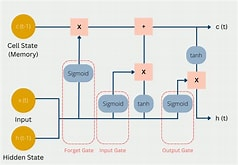

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate some random data for demonstration
# Input sequence: [0.1, 0.2, 0.3, 0.4, 0.5]
# Output sequence: [0.6, 0.7, 0.8, 0.9, 1.0]


In [2]:
# Define input sequence
X = np.array([[[0.1], [0.2], [0.3], [0.4], [0.5]]])

# Define output sequence
y = np.array([[0.6, 0.7, 0.8, 0.9, 1.0]])

In [3]:
# Define and build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(5, 1)),  # 50 units in LSTM layer
    Dense(5)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [4]:

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 10,655
Trainable params: 10,655
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Make predictions
predictions = model.predict(X)

# Print predictions
print("Predictions:")
print(predictions)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6428
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6323
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6219
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6115
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6010
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5905
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5800
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5693
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5586
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5477
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5367
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5256
Epoch 13/100
1/1 [==============================] - 0s 5ms/s

## Quick Practice Generate an input sequence consisting of even numbers and predict the next even number in the sequence


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate an input sequence of even numbers
def generate_input_sequence(start, length):
    sequence = [2 * i for i in range(start, start + length)]
    return np.array(sequence)

# Generate input sequence with 100 rows
input_sequence = generate_input_sequence(start=1, length=100)

# Output sequence (next even number in the sequence)
output_sequence = input_sequence[1:]

# Preprocess the data
def create_dataset(input_sequence, output_sequence, time_steps):
    X, y = [], []
    for i in range(len(input_sequence) - time_steps):
        X.append(input_sequence[i:i+time_steps])
        y.append(output_sequence[i])
    return np.array(X), np.array(y)

time_steps = 3  # Number of time steps (length of input sequence for each training example)
X, y = create_dataset(input_sequence, output_sequence, time_steps)

# Define the RNN model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Test data for final prediction
test_data = np.array([input_sequence[-3:]])  # Taking the last three elements of the input sequence

# Generate the output sequence
def generate_prediction(model, test_data):
    x_input = test_data.reshape((1, time_steps, 1))
    y_pred = model.predict(x_input, verbose=0)
    return int(y_pred[0][0])

# Final prediction
next_even_number = generate_prediction(model, test_data)

print("Final Prediction (Next Even Number):", next_even_number)


## Text Generation using LSTM

- Prepare Sequences: The input sequence is broken down into n-grams to create multiple input-output pairs.
- Pad Sequences: The sequences are padded to ensure they have the same length.
- Create Training Data: x_train contains the sequences without the last word, and y_train contains the last word of each sequence.
- One-hot Encode Labels: y_train is one-hot encoded to match the output shape of the model.
- Build LSTM Model: The model consists of an embedding layer, an LSTM layer, and a dense output layer.
- Train the Model: The model is trained on the prepared input-output pairs.
- Generate Text: The generate_text function generates new words based on the seed text by predicting the next word iteratively.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Sample input text
input_text = "Suyashi loves to Dance"

# Prepare tokenizer and word index
tokenizer = Tokenizer()
tokenizer.fit_on_texts([input_text])
word_index = tokenizer.word_index
total_words = len(word_index) + 1

# Convert input text to sequence
input_sequence = tokenizer.texts_to_sequences([input_text])[0]

# Prepare input-output pairs
sequences = []
for i in range(1, len(input_sequence)):
    n_gram_sequence = input_sequence[:i+1]
    sequences.append(n_gram_sequence)

# Pad sequences and create predictors and label
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')
x_train, y_train = sequences[:,:-1], sequences[:,-1]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=total_words)

# Build LSTM model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))  # Embedding layer with 50 dimensions
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01))

# Train the model
model.fit(x_train, y_train, epochs=100, verbose=1)

# Function to generate text
def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generate text
seed_text = "Suyashi loves to Dance"
generated_text = generate_text(seed_text, 5, model, tokenizer, max_sequence_len)
print(generated_text)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Sample larger input text corpus
corpus = [
    "Ashi loves to dance",
    "She enjoys listening to music",
    "Dancing is her favorite hobby",
    "She practices dance every day",
    "Her dance moves are graceful",
    "Ashi loves to perform on stage"
]

# Prepare tokenizer and word index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1

# Prepare input-output pairs
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences and create predictors and label
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')
x_train, y_train = sequences[:,:-1], sequences[:,-1]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=total_words)

# Build LSTM model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))  # Embedding layer with 50 dimensions
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01))

# Train the model
model.fit(x_train, y_train, epochs=500, verbose=1)

# Function to generate text with temperature
def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len, temperature=1.0):
    output_text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([output_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_probs = np.asarray(predicted_probs).astype('float64')
        predicted_probs = np.log(predicted_probs) / temperature
        exp_preds = np.exp(predicted_probs)
        predicted_probs = exp_preds / np.sum(exp_preds)
        predicted_word_index = np.random.choice(range(len(predicted_probs)), p=predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        output_text += " " + output_word
    return output_text

# Function to generate multiple sentences
def generate_sentences(seed_text, num_sentences, words_per_sentence, model, tokenizer, max_sequence_len, temperature=1.0):
    sentences = []
    for _ in range(num_sentences):
        sentence = generate_text(seed_text, words_per_sentence, model, tokenizer, max_sequence_len, temperature)
        sentences.append(sentence.strip())
    return ', '.join(sentences)

# Generate multiple sentences
seed_text = "Ashi"
num_sentences = 5
words_per_sentence = 10
temperature = 1.0  # Adjust temperature for more or less randomness
generated_text = generate_sentences(seed_text, num_sentences, words_per_sentence, model, tokenizer, max_sequence_len, temperature)
print(generated_text)
